In [1]:
import pandas as pd 
import numpy as np 


In [2]:
df=pd.read_csv('training_data_with_weather_info_week_1.csv')
df.head()

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities,day_from_jan_first,temp,min,max,stp,slp,dewp,rh,ah,wdsp,prcp,fog
0,1,NaN,Afghanistan,33.0,65.0,2020-01-22,0.0,0.0,22,42.6,33.6,54.9,999.9,1024.3,27.4,0.545709,0.186448,9.4,0.00,0
1,2,NaN,Afghanistan,33.0,65.0,2020-01-23,0.0,0.0,23,42.0,32.7,55.9,999.9,1020.8,22.8,0.461259,0.163225,14.9,99.99,1
2,3,NaN,Afghanistan,33.0,65.0,2020-01-24,0.0,0.0,24,40.1,36.9,43.2,999.9,1018.6,34.5,0.801794,0.325375,10.4,0.17,1
3,4,NaN,Afghanistan,33.0,65.0,2020-01-25,0.0,0.0,25,46.0,37.9,56.3,999.9,1018.0,37.8,0.728175,0.214562,6.1,0.57,1
4,5,NaN,Afghanistan,33.0,65.0,2020-01-26,0.0,0.0,26,42.8,36.1,53.1,999.9,1014.8,33.2,0.685513,0.231656,10.8,0.00,1


In [3]:
# Dropping the null values in the datasets 
df=df.dropna()

In [4]:
df.head()

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities,day_from_jan_first,temp,min,max,stp,slp,dewp,rh,ah,wdsp,prcp,fog
504,745,Australian Capital Territory,Australia,-35.4735,149.0124,2020-01-22,0.0,0.0,22,77.7,54.0,91.0,937.2,1002.3,42.5,0.282482,0.078943,6.5,0.00,0
505,746,Australian Capital Territory,Australia,-35.4735,149.0124,2020-01-23,0.0,0.0,23,68.6,57.0,90.0,938.5,1003.7,56.0,0.638922,0.163565,7.3,0.25,1
506,747,Australian Capital Territory,Australia,-35.4735,149.0124,2020-01-24,0.0,0.0,24,71.7,56.8,81.7,945.2,1010.9,49.7,0.454962,0.119475,5.3,0.00,0
507,748,Australian Capital Territory,Australia,-35.4735,149.0124,2020-01-25,0.0,0.0,25,77.6,60.3,90.0,944.9,1010.5,53.1,0.422837,0.118030,4.5,0.00,0
508,749,Australian Capital Territory,Australia,-35.4735,149.0124,2020-01-26,0.0,0.0,26,76.5,59.4,91.8,946.4,1012.1,51.5,0.413475,0.113989,6.1,0.00,0


In [5]:
Date=df['Date']
min1=df['min']
max1=df['max']
temp=df['temp']
Sunrise=df['stp']
Sunset=df['slp']
l3=pd.DataFrame(list(zip(Date,min1,max1,temp,Sunrise,Sunset)),columns=['Date','min','max','temp','Sunrise','Sunset'])
l3.head()

,Date,min,max,temp,Sunrise,Sunset
0,2020-01-22,54.0,91.0,77.7,937.2,1002.3
1,2020-01-23,57.0,90.0,68.6,938.5,1003.7
2,2020-01-24,56.8,81.7,71.7,945.2,1010.9
3,2020-01-25,60.3,90.0,77.6,944.9,1010.5
4,2020-01-26,59.4,91.8,76.5,946.4,1012.1


In [6]:
print("The shape of the data",l3.shape)

The shape of the data (5378, 6)


In [7]:
l3=l3.set_index('Date')

In [8]:
l3.head()

,min,max,temp,Sunrise,Sunset
Date,,,,,
2020-01-22,54.0,91.0,77.7,937.2,1002.3
2020-01-23,57.0,90.0,68.6,938.5,1003.7
2020-01-24,56.8,81.7,71.7,945.2,1010.9
2020-01-25,60.3,90.0,77.6,944.9,1010.5
2020-01-26,59.4,91.8,76.5,946.4,1012.1


<AxesSubplot:xlabel='Date'>

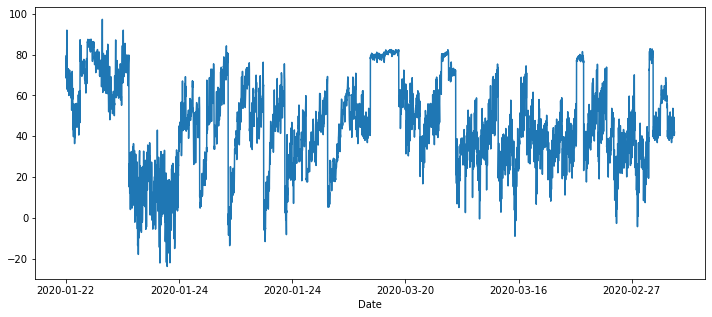

In [9]:
l3['temp'].plot(figsize=(12,5))

In [10]:
# Check for stationarity

In [12]:
from statsmodels.tsa.stattools import adfuller

In [13]:
def ad_test(dataset):
    dftest=adfuller(dataset,autolag='AIC')
    print("1 ADF :",dftest[0])
    print("2 P-value :",dftest[1])
    print("3 Num of logs :",dftest[2])
    print("4 Num og observations used for ADF regression  and Critical Values Calculation",dftest[3])
    print("5 Crticial Values :")
    for key,val in dftest[4].items():
        print("\t",key,":",val)
    

In [14]:
ad_test(l3['temp'])

1 ADF : -5.7550651423006
2 P-value : 5.845588054089869e-07
3 Num of logs : 32
4 Num og observations used for ADF regression  and Critical Values Calculation 5345
5 Crticial Values :
	 1% : -3.431574030549211
	 5% : -2.862080896827635
	 10% : -2.567057918716162


In [15]:
# Figure out the order of arima model 
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")


In [16]:
import statsmodels.api as sm
 #SPLIT THE DATA INTO TRAINING AND TESTING

In [17]:
print(l3.shape)
train=l3.iloc[:-30]
test=l3.iloc[-30:]
print(train.shape,test.shape)

(5378, 5)
(5348, 5) (30, 5)


In [18]:
## Train the model
model=sm.tsa.arima.ARIMA(train['temp'],order=(1,0,5))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   temp   No. Observations:                 5348
Model:                 ARIMA(1, 0, 5)   Log Likelihood              -17673.982
Date:                Tue, 11 Oct 2022   AIC                          35363.963
Time:                        23:31:08   BIC                          35416.639
Sample:                             0   HQIC                         35382.363
                               - 5348                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.4765      4.191     10.850      0.000      37.261      53.692
ar.L1          0.9888      0.002    400.102      0.000       0.984       0.994
ma.L1         -0.0827      0.013     -6.509      0.000      -0.108      -0.058
ma.L2         -0.2560      0.009    -28.143      0.000      -0.274      -0.238
ma.L3         -0.0911      0.013     -6.942      0.000      -0.117      -0.065
ma.L4         -0.0819      0.011     -7.237      0.000      -0.104      -0.060
ma.L5         -0.0315      0.013     -2.480      0.013      -0.056      -0.007
sigma2        43.4397      0.385    112.685      0.000      42.684      44.195
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):             42748.96
Prob(Q):                              0.74   Prob(JB):                         0.00
Heteroskedasticity (H):               0.92   Skew:                            -1.61
Prob(H) (two-sided):                  0.08   Kurtosis:                        16.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,type='levels')
print(pred)

5348    45.262666
5349    45.464652
5350    45.280075
5351    45.318543
5352    45.405724
5353    45.406514
5354    45.407295
5355    45.408067
5356    45.408831
5357    45.409587
5358    45.410334
5359    45.411072
5360    45.411803
5361    45.412525
5362    45.413239
5363    45.413945
5364    45.414643
5365    45.415334
5366    45.416017
5367    45.416692
5368    45.417359
5369    45.418020
5370    45.418672
5371    45.419318
5372    45.419956
5373    45.420587
5374    45.421211
5375    45.421829
5376    45.422439
5377    45.423042
Name: predicted_mean, dtype: float64


<AxesSubplot:xlabel='Date'>

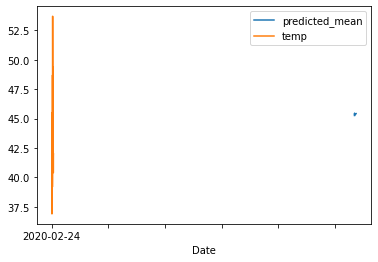

In [20]:
pred.plot(legend=True)
test['temp'].plot(legend=True)

In [21]:
 test['temp'].mean()

43.38666666666667

In [22]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rsme=sqrt(mean_squared_error(pred,test['temp']))
print(rsme)

4.400855314597735


In [26]:
model2=sm.tsa.arima.ARIMA(l3['temp'],order=(1,0,5))
model2=model2.fit()
l3.tail()

,min,max,temp,Sunrise,Sunset
Date,,,,,
2020-03-20,40.8,46.8,43.1,23.2,1029.7
2020-03-21,39.2,45.3,42.0,22.0,1028.5
2020-03-22,33.6,45.5,40.4,22.2,1028.8
2020-03-23,35.6,48.0,41.8,21.6,1028.1
2020-03-24,33.3,50.9,42.0,19.9,1026.5


In [36]:
# For Future Dates
index_future_dates=pd.date_range(start='2020-12-20',end='2021-01-29')
pred=model2.predict(start=len(l3),end=len(l3)+40,type='levels').rename('ARIMA Predictions')
print(pred)
pred.index=index_future_dates

5378    42.406426
5379    42.841526
5380    42.982924
5381    43.062894
5382    43.112858
5383    43.139108
5384    43.165065
5385    43.190733
5386    43.216113
5387    43.241210
5388    43.266026
5389    43.290566
5390    43.314831
5391    43.338826
5392    43.362552
5393    43.386013
5394    43.409212
5395    43.432153
5396    43.454836
5397    43.477267
5398    43.499447
5399    43.521379
5400    43.543067
5401    43.564512
5402    43.585717
5403    43.606686
5404    43.627421
5405    43.647924
5406    43.668198
5407    43.688245
5408    43.708069
5409    43.727671
5410    43.747054
5411    43.766221
5412    43.785173
5413    43.803914
5414    43.822446
5415    43.840771
5416    43.858891
5417    43.876808
5418    43.894526
Name: ARIMA Predictions, dtype: float64


<AxesSubplot:>

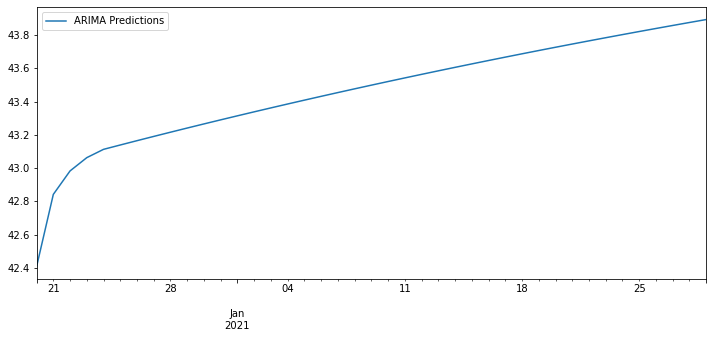

In [37]:

pred.plot(figsize=(12,5),legend=True)